# EPL dataset

DESCRIPTION- The dataset has all the 532 players that played in the EPL season 2020-21 and their standard stats such as Goals, Assists,Position, xG, xA, Passes Attempted, Pass Accuracy, and more 10 columns.

GOAL-I will be using this dataset to predict the number of goals for player , and also predict the position of the players using stats which most like affect the number of goals and their position(using KNN).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Importing and Printing Data

In [2]:
data=pd.read_csv("/Users/pratik/Desktop/EPL_20_21.csv")
data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
#Dataframe shape
data.shape

(532, 18)

# EDA, Numerical and Graphical Summary

In [4]:
#How many players played for each club throughout the season
data.Club.value_counts()

West Bromwich Albion       30
Manchester United          29
Arsenal                    29
Southampton                29
Everton                    29
Liverpool FC               28
Fulham                     28
Chelsea                    27
Newcastle United           27
Brighton                   27
Wolverhampton Wanderers    27
Sheffield United           27
Leicester City             27
Burnley                    25
Manchester City            24
Crystal Palace             24
Tottenham Hotspur          24
West Ham United            24
Aston Villa                24
Leeds United               23
Name: Club, dtype: int64

AGE DISTRIBUTION OF THE PLAYERS

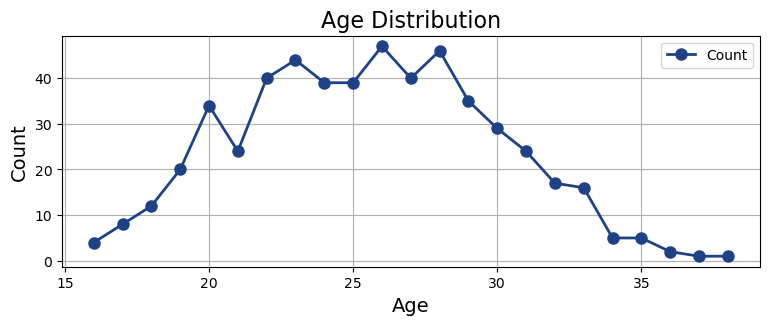

In [5]:
#Printing the age distribution
age_counts = data.Age.value_counts().sort_index()

#Premier League color theme
colors = ['#1F4287', '#8E8E8E', '#DB2C30', '#48B3FF', '#8C6239']

#Plotting line chart
plt.figure(figsize=(9,3))
age_counts.plot(kind='line', color=colors, marker='o', linestyle='-', linewidth=2, markersize=8)

#Customizing the chart
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.legend(['Count'], loc='upper right')

#Printing graph
plt.show()

CONCLUSION-THERE IS A STEEP DROP IN NUMBER OF PLAYERS AFTER 28 YEARS.

In [6]:
#Player positions
data.Position.value_counts()

DF       178
MF       108
FW        81
FW,MF     47
GK        42
MF,FW     36
DF,MF     15
MF,DF     13
FW,DF      6
DF,FW      6
Name: Position, dtype: int64

In [7]:
#Players from my favourite team
data[data.Club=="Liverpool FC"]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
80,Andrew Robertson,Liverpool FC,SCO,DF,26,38,38,3383,1,7,3214,79.9,0,0,0.04,0.18,2,0
81,Mohamed Salah,Liverpool FC,EGY,FW,28,37,34,3078,22,5,1288,83.2,6,6,0.61,0.18,0,0
82,Trent Alexander-Arnold,Liverpool FC,ENG,DF,21,36,34,3031,2,7,2941,75.3,0,0,0.08,0.24,2,0
83,Georginio Wijnaldum,Liverpool FC,NED,MF,29,38,34,2941,2,0,1747,93.3,0,0,0.10,0.05,1,0
84,Alisson,Liverpool FC,BRA,GK,27,33,33,2970,1,0,1137,85.2,0,0,0.00,0.00,1,0
85,Roberto Firmino,Liverpool FC,BRA,FW,28,36,33,2838,9,7,1308,79.7,0,0,0.40,0.20,2,0
86,Sadio Mané,Liverpool FC,SEN,FW,28,35,31,2810,11,7,1064,75.4,0,0,0.49,0.18,3,0
87,Fabinho,Liverpool FC,BRA,"DF,MF",26,30,28,2567,0,0,2049,91.1,0,0,0.02,0.01,6,0
88,Thiago Alcántara,Liverpool FC,ESP,MF,29,24,20,1854,1,0,1674,89.5,0,0,0.07,0.11,4,0
89,Jordan Henderson,Liverpool FC,ENG,"MF,DF",30,21,20,1704,1,1,1812,86.8,0,0,0.09,0.07,0,0


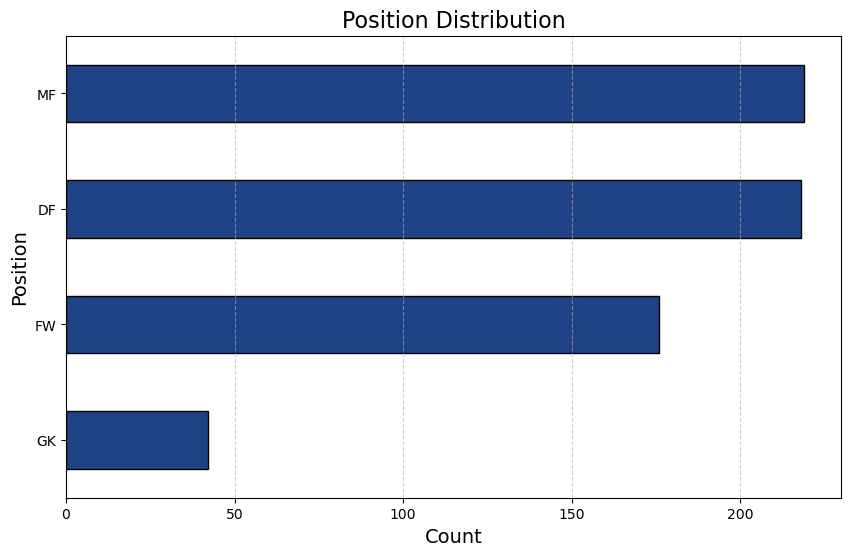

In [8]:
#Split positions in the Position column and create a new DataFrame
positions = data['Position'].str.split(',', expand=True)

#Reshape the dataframe and counting positions
positions_stacked = positions.stack()
position_counts = positions_stacked.value_counts()

#Creating bar graph
plt.figure(figsize=(10, 6))
position_counts.sort_values().plot(kind='barh', color='#1F4287', edgecolor='black')

#Customizing bar plot
plt.title('Position Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)

#Printing bar plot
plt.show()

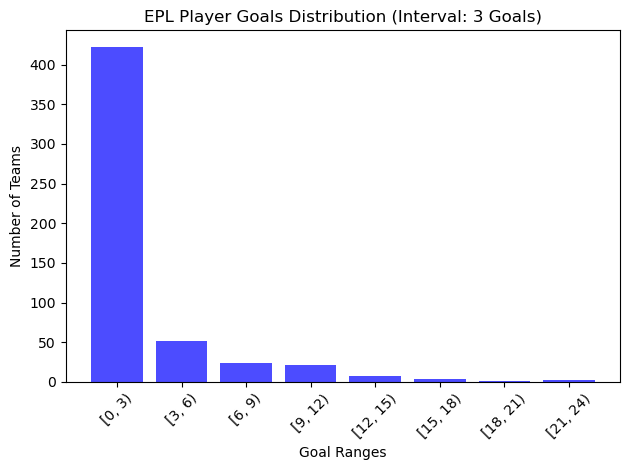

In [9]:
goal_intervals = [0, 3, 6, 9, 12, 15, 18, 21, 24]

# Create a new column 'Goal Range' to categorize goals into intervals
data['Goal Range'] = pd.cut(data['Goals'], bins=goal_intervals, right=False, include_lowest=True)

# Count the number of teams in each goal range
goal_counts = data['Goal Range'].value_counts().sort_index()

# Plot the bar graph
plt.bar(range(len(goal_counts)), goal_counts, align='center', color='blue', alpha=0.7)
plt.xlabel('Goal Ranges')
plt.ylabel('Number of Teams')
plt.title('EPL Player Goals Distribution (Interval: 3 Goals)')
plt.xticks(range(len(goal_counts)), goal_counts.index, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

CONCLUSION-IT IS EASIER TO BREAK INTO THE PREMIER LEAGUE AS A MIDFIELDER OF DEFENDER(ASSUMING THAT THERE ARE EQUAL NUMBER OF PLAYERS IN EACH POSITION)

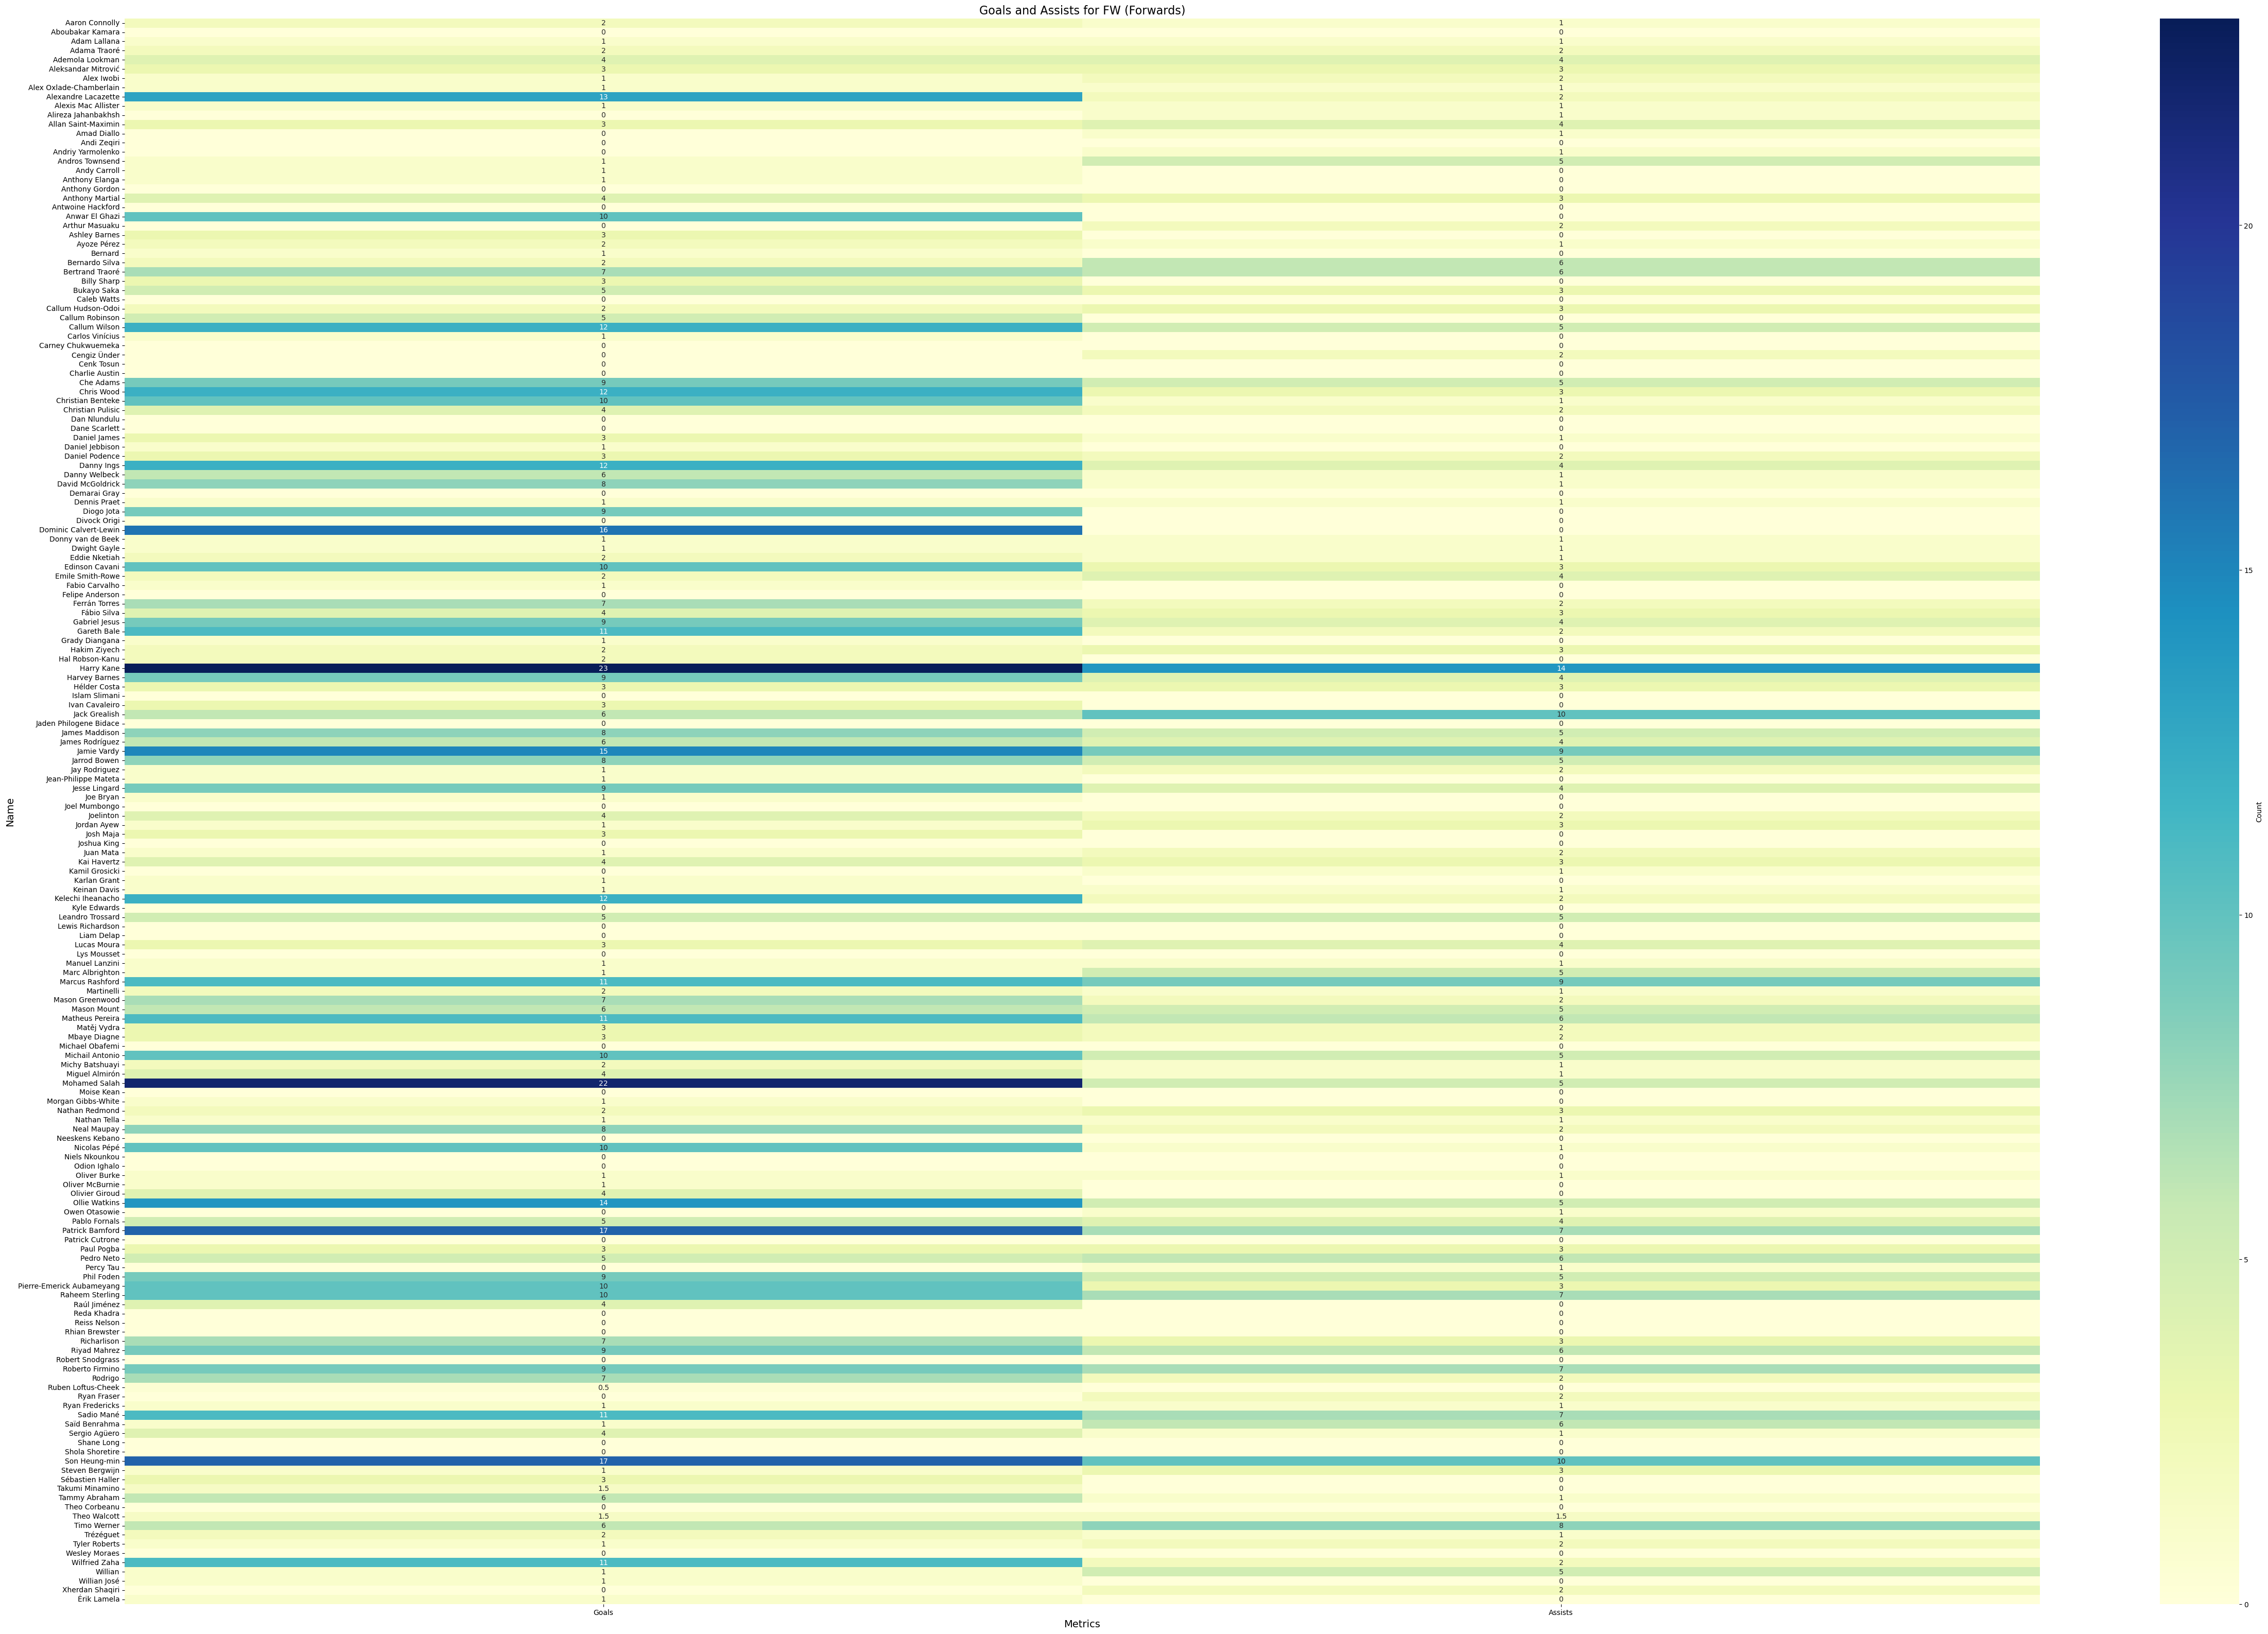

In [10]:
#Counting positions
forwards_data = data[data['Position'].str.contains('FW')]

#Aggregate duplicate entries using the mean
forwards_data = forwards_data.groupby('Name').agg({'Goals': 'mean', 'Assists': 'mean'}).reset_index()

# Create a heatmap
plt.figure(figsize=(60, 40))
heatmap_data = forwards_data.set_index('Name')[['Goals', 'Assists']]
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count'})

# Customizing the plot
plt.title('Goals and Assists for FW (Forwards)', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Name', fontsize=14)

# Show the plot
plt.show()

CONCLUSION-HARRY KANE & MO SALAH ARE THE HIGHEST GOALSCORING FORWARDS FOR THIS SEASON, WHILE HARRY KANE GOT THE MOST ASSISTS BEING A FORWARD

# ML Models

In [11]:
data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Goal Range
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,"[6, 9)"
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,"[0, 3)"
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,"[6, 9)"
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,"[3, 6)"
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,"[0, 3)"


Root Mean Squared Error (RMSE): 1.831081928154671
R-squared: 0.6242177744424008


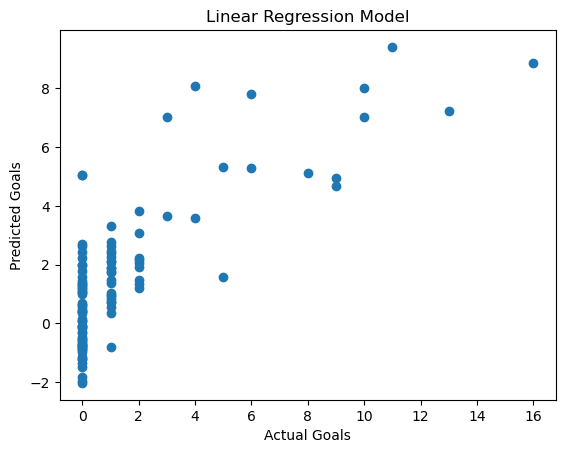

In [12]:
#Linear Regression Model to predict the number of goals in at the end of the season
#Selecting features and target variable
features = ['Age', 'Matches', 'Starts', 'Perc_Passes_Completed', 'xG', 'xA']
target = 'Goals'

X = data[features]
y = data[target]

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing & Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Making predictions
y_pred = model.predict(X_test)

#Calculations
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

#Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Linear Regression Model')
plt.show()

Gaussian Naive Bayes RMSE: 1.6406062248591917
R-squared: 0.6983318975644139


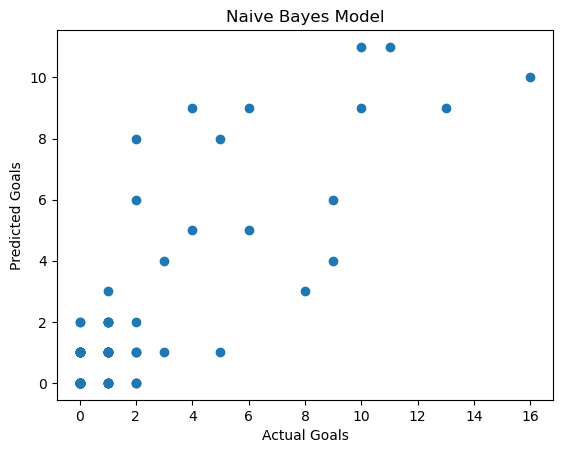

In [13]:
#Naive Bayes Model to predict the number of goals in at the end of the season
#Selecting features and target variables
features = ['Age', 'Matches', 'Starts', 'Perc_Passes_Completed', 'xG','xA']
target = 'Goals'

X = data[features]
y = data[target]

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing & Training the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#Making predictions
nb_y_pred = nb_model.predict(X_test)

#Calculations
nb_rmse = np.sqrt(mean_squared_error(y_test, nb_y_pred))
r2 = r2_score(y_test, nb_y_pred)

print(f'Gaussian Naive Bayes RMSE: {nb_rmse}')
print(f'R-squared: {r2}')

#Plot
plt.scatter(y_test, nb_y_pred)
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Naive Bayes Model')
plt.show()

SVM RMSE: 2.1090006421640908
R-squared: 0.5014897350975291


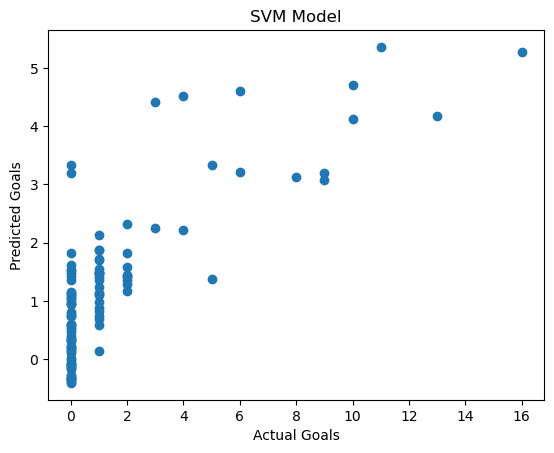

In [14]:
#SVM Model to predict the number of goals in at the end of the season
#Selecting features and target variables
features = ['Age', 'Matches', 'Starts', 'Perc_Passes_Completed', 'xG','xA']
target = 'Goals'

X = data[features]
y = data[target]

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing & Training SVM
svm_model = SVR(kernel='linear')  # You can try different kernels like 'linear', 'rbf', etc.
svm_model.fit(X_train, y_train)

#Making predictions
svm_y_pred = svm_model.predict(X_test)

#Calculations
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_y_pred))
r2 = r2_score(y_test, svm_y_pred)

print(f'SVM RMSE: {svm_rmse}')
print(f'R-squared: {r2}')

#Plot
plt.scatter(y_test, svm_y_pred)
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('SVM Model')
plt.show()

Accuracy: 0.5102040816326531


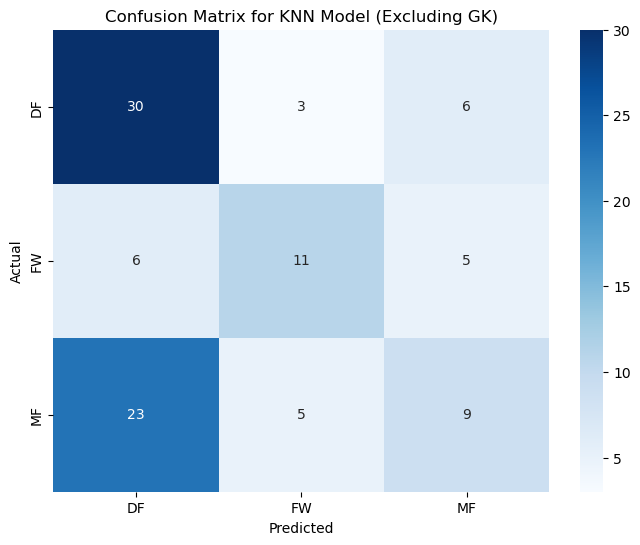

In [15]:
#KNN model to see if players can play in alternate position
#Exclude players with the position "GK"
data = data[data['Position'] != 'GK']

# Select features (independent variables) and target (dependent variable)
features = ['Age', 'Matches', 'Starts', 'Mins', 'Goals', 'Assists', 'Passes_Attempted',
            'Perc_Passes_Completed', 'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA']
target = 'Position'

# Include only the first two letters in the 'Position' column
data['Position'] = data['Position'].str[:2]

X = data[features]
y = data[target]

#Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing & Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with the number of neighbors
knn_model.fit(X_train, y_train)

#Making predictions on the test set
knn_y_pred = knn_model.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, knn_y_pred)
print(f'Accuracy: {accuracy}')

#Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, knn_y_pred)

#Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model (Excluding GK)')
plt.show()